# Exercise 3 - Stress Fields from Perceptrons

### Task
For a one-dimensional displacement field, calculate the strains and stresses using PyTorch

In [1]:
import torch
import matplotlib.pyplot as plt
from torch.autograd import grad

perceptron parameters and perceptron definition

In [2]:
w = 200.0E-6
b = 1.0
model = torch.nn.Linear(1, 1)

model.weight.data = torch.tensor([[w]])
model.weight.bias = torch.tensor([b])

spatial grid creation

In [3]:
nx = 5
x = torch.linspace(-1, 1, nx, requires_grad=True).unsqueeze(1)

sample displacement field at points on x vector

In [4]:
d = model(x)
d

tensor([[0.4809],
        [0.4810],
        [0.4811],
        [0.4812],
        [0.4813]], grad_fn=<AddmmBackward0>)

gradient computation of modeled displacement field

In [6]:
dd_dx = grad(d, x, torch.ones_like(x), create_graph=True)[0]
dd_dx

tensor([[0.0002],
        [0.0002],
        [0.0002],
        [0.0002],
        [0.0002]], grad_fn=<MmBackward0>)

strain computation

In [8]:
eps = dd_dx

stress computation

In [9]:
E = 210000.0
sig = E * eps


visualize displacement, strain and stress across spatial grid

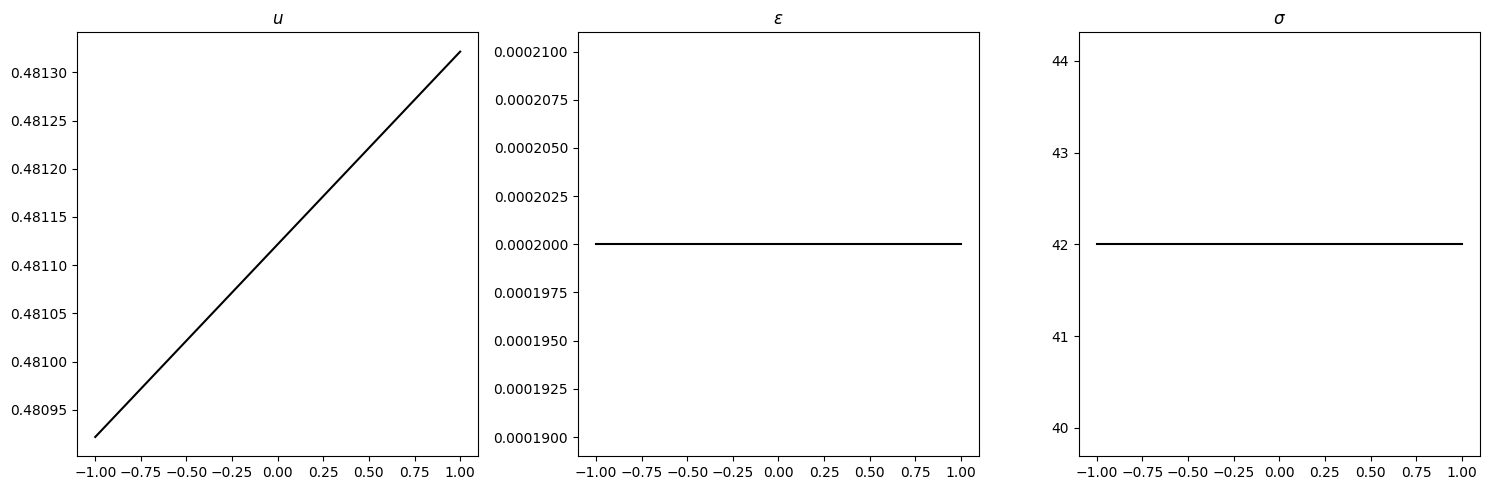

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].plot(x.detach(), d.detach(), "k")
ax[0].set_title("$u$")
ax[1].plot(x.detach(), eps.detach(), "k")
ax[1].set_title("$\\varepsilon$")
ax[2].plot(x.detach(), sig.detach(), "k")
ax[2].set_title("$\\sigma$")
fig.tight_layout()
plt.show()